In [498]:
import pandas as pd
import requests
import numpy as np
from IPython.display import Image, HTML
from urllib.request import urlretrieve
import urllib.request
import requests
import shutil
from os import listdir
from PIL import Image as PImage
from collections import Counter
import os, sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer, GlobalAveragePooling2D,ZeroPadding2D
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, mobilenet_v2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
mushrooms_links = pd.read_csv('mushrooms_img.csv')
mushrooms_links.head()

,Unnamed: 0,Image,edibility
0,0,/images/poisonous32.png,posionous
1,1,/../data/fungi/Amanitabisporigera1-thumb.jpg,posionous
2,2,/../data/fungi/Amanitabisporigera2-thumb.jpg,posionous
3,3,/../data/fungi/Amanitabisporigera3-thumb.jpg,posionous
4,4,/images/poisonous32.png,posionous


In [3]:
mushrooms_links['Link_Half'] = 'https://www.mushroom.world'

#remove all icon image links
mushrooms_links = mushrooms_links[mushrooms_links.Image != '/images/edible32.png']
mushrooms_links = mushrooms_links[mushrooms_links.Image != '/images/inedible32.png']
mushrooms_links = mushrooms_links[mushrooms_links.Image != '/images/poisonous32.png']

#remove unnecessary starting characters
mushrooms_links['Image'] = mushrooms_links['Image'].str[3:]

#dropping column that we dont need
mushrooms_links.drop(columns=['Unnamed: 0'], inplace = True)

#making sure everything workedmushrooms_links
mushrooms_links.head()

,Image,edibility,Link_Half
1,/data/fungi/Amanitabisporigera1-thumb.jpg,posionous,https://www.mushroom.world
2,/data/fungi/Amanitabisporigera2-thumb.jpg,posionous,https://www.mushroom.world
3,/data/fungi/Amanitabisporigera3-thumb.jpg,posionous,https://www.mushroom.world
5,/data/fungi/Amanitaphalloides1-thumb.JPG,posionous,https://www.mushroom.world
6,/data/fungi/Amanitaphalloides2-thumb.jpg,posionous,https://www.mushroom.world


## The cell below downloads all images to your computer!!!

In [ ]:
for img in mushrooms_links["Image"]:
    url = str("https://www.mushroom.world"+img)
    filename = url.split("/")[-1]
    r = requests.get(url, stream=True)
    if r.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(r.content)

In [330]:
train_ds = image_dataset_from_directory(
  './Mushroom_Images/',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    validation_split=0.15,
    subset="training",
    batch_size=32,
    seed=123)

val_ds = image_dataset_from_directory(
  './Mushroom_Images/',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    validation_split=0.15,
    subset="validation",
    batch_size=32,
    seed=123)

test_ds = image_dataset_from_directory(
   './Test_Images/',
     labels='inferred',
     label_mode='categorical',
     image_size=(256, 256),
     batch_size=32,
     seed=123)

Found 668 files belonging to 2 classes.
Using 568 files for training.
Found 668 files belonging to 2 classes.
Using 100 files for validation.
Found 237 files belonging to 2 classes.


In [247]:
i

0

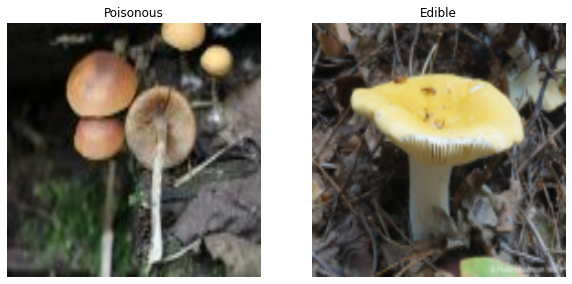

In [350]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
        plt.savefig("Images.png", transparent=True)

In [344]:
class_names = train_ds.class_names
print(class_names)

['Edible', 'Poisonous']


In [ ]:
encoder = LabelEncoder()
encoder.fit(class_names)
encoded_Y = encoder.transform(class_names)

In [260]:
classes = np.array(class_names)

label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(classes)
y_categorical = to_categorical(vec)
y_categorical

array([[1., 0.],
       [0., 1.]], dtype=float32)

In [435]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [427]:
Sequential_NN = Sequential()

Sequential_NN.add(InputLayer(input_shape = (256,256,3)))

Sequential_NN.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN.add(MaxPooling2D())

Sequential_NN.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN.add(MaxPooling2D())

Sequential_NN.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN.add(MaxPooling2D())

Sequential_NN.add(Flatten())

Sequential_NN.add(Dense(20, activation = 'relu'))

Sequential_NN.add(Dense(2, activation = 'sigmoid'))

metrics={'output_a': 'accuracy', 'output_b': tf.keras.metrics.Precision()}

Sequential_NN.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = [metrics])

Sequential_NN.summary()

Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_187 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 conv2d_188 (Conv2D)         (None, 252, 252, 16)      2320      
                                                                 
 conv2d_189 (Conv2D)         (None, 250, 250, 16)      2320      
                                                                 
 max_pooling2d_116 (MaxPooli  (None, 125, 125, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_190 (Conv2D)         (None, 123, 123, 16)      2320      
                                                                 
 conv2d_191 (Conv2D)         (None, 121, 121, 16)      2320      
                                                     

In [428]:
history = Sequential_NN.fit(train_ds, epochs = 30, validation_data=val_ds)

Epoch 1/30
18/18 [==============================] - 35s 2s/step - loss: 5.8337 - accuracy: 0.6039 - precision_42: 0.5990 - val_loss: 0.6918 - val_accuracy: 0.6200 - val_precision_42: 0.6200
Epoch 2/30
18/18 [==============================] - 34s 2s/step - loss: 0.6911 - accuracy: 0.6268 - precision_42: 0.6268 - val_loss: 0.6905 - val_accuracy: 0.6200 - val_precision_42: 0.6200
Epoch 3/30
18/18 [==============================] - 34s 2s/step - loss: 0.6898 - accuracy: 0.6268 - precision_42: 0.6268 - val_loss: 0.6893 - val_accuracy: 0.6200 - val_precision_42: 0.6200
Epoch 4/30
18/18 [==============================] - 34s 2s/step - loss: 0.6885 - accuracy: 0.6268 - precision_42: 0.6268 - val_loss: 0.6881 - val_accuracy: 0.6200 - val_precision_42: 0.6200
Epoch 5/30
18/18 [==============================] - 34s 2s/step - loss: 0.6873 - accuracy: 0.6268 - precision_42: 0.6268 - val_loss: 0.6870 - val_accuracy: 0.6200 - val_precision_42: 0.6200
Epoch 6/30
18/18 [==============================] 

In [316]:
Sequential_NN_Second = Sequential()

Sequential_NN_Second.add(InputLayer(input_shape = (256,256,3)))

Sequential_NN_Second.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN_Second.add(MaxPooling2D())

Sequential_NN_Second.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN_Second.add(MaxPooling2D())

Sequential_NN_Second.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN_Second.add(Conv2D(filters = 16, kernel_size = 3, activation = 'relu'))

Sequential_NN_Second.add(MaxPooling2D())

Sequential_NN_Second.add(Flatten())

Sequential_NN_Second.add(Dense(20, activation = 'relu'))

Sequential_NN_Second.add(Dense(2, activation = 'sigmoid'))

metrics={'output_a': 'accuracy', 'output_b': tf.keras.metrics.Precision()}

Sequential_NN_Second.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = [metrics])

Sequential_NN_Second.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_138 (Conv2D)         (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_139 (Conv2D)         (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_140 (Conv2D)         (None, 60, 60, 16)        2320      
                                                                 
 conv2d_141 (Conv2D)         (None, 58, 58, 16)      

In [317]:
history_second = Sequential_NN_Second.fit(train_ds, epochs = 30, validation_data=val_ds)

Epoch 1/30
19/19 [==============================] - 14s 672ms/step - loss: 20.9540 - accuracy: 0.5415 - precision_36: 0.5415 - val_loss: 0.6931 - val_accuracy: 0.6061 - val_precision_36: 0.6061
Epoch 2/30
19/19 [==============================] - 13s 688ms/step - loss: 0.6928 - accuracy: 0.6279 - precision_36: 0.6279 - val_loss: 0.6925 - val_accuracy: 0.6061 - val_precision_36: 0.6061
Epoch 3/30
19/19 [==============================] - 13s 680ms/step - loss: 0.6918 - accuracy: 0.6279 - precision_36: 0.6279 - val_loss: 0.6916 - val_accuracy: 0.6061 - val_precision_36: 0.6061
Epoch 4/30
19/19 [==============================] - 13s 676ms/step - loss: 0.6907 - accuracy: 0.6279 - precision_36: 0.6279 - val_loss: 0.6906 - val_accuracy: 0.6061 - val_precision_36: 0.6061
Epoch 5/30
19/19 [==============================] - 13s 653ms/step - loss: 0.6895 - accuracy: 0.6279 - precision_36: 0.6279 - val_loss: 0.6895 - val_accuracy: 0.6061 - val_precision_36: 0.6061
Epoch 6/30
19/19 [================

In [319]:
Sequential_NN_Second.evaluate(val_ds)

3/3 [==============================] - 1s 118ms/step - loss: 0.6729 - accuracy: 0.6061 - precision_36: 0.6061


[0.6728986501693726, 0.6060606241226196, 0.6060606241226196]

In [318]:
Sequential_NN_.evaluate(val_ds)

3/3 [==============================] - 1s 238ms/step - loss: 4.9054 - accuracy: 0.5909 - precision_25: 0.5909


[4.9054179191589355, 0.5909090638160706, 0.5909090638160706]

In [269]:
Sequential_NN_more_filters = Sequential()

Sequential_NN_more_filters.add(InputLayer(input_shape = (256,256,3)))

Sequential_NN_more_filters.add(Conv2D(filters = 100, kernel_size = 3, activation = 'relu'))

Sequential_NN_more_filters.add(MaxPooling2D())

Sequential_NN_more_filters.add(Conv2D(filters = 100, kernel_size = 3, activation = 'relu'))

Sequential_NN_more_filters.add(MaxPooling2D())

Sequential_NN_more_filters.add(Flatten())

Sequential_NN_more_filters.add(Dense(20, activation = 'relu'))

Sequential_NN_more_filters.add(Dense(2, activation = 'sigmoid'))

metrics={'output_a': 'accuracy', 'output_b': tf.keras.metrics.Precision()}

Sequential_NN_more_filters.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = [metrics])

Sequential_NN_more_filters.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 254, 254, 100)     2800      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 127, 127, 100)    0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 125, 125, 100)     90100     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 62, 62, 100)      0         
 g2D)                                                            
                                                                 
 flatten_29 (Flatten)        (None, 384400)            0         
                                                                 
 dense_71 (Dense)            (None, 20)              

In [270]:
history2 = Sequential_NN_more_filters.fit(train_ds, epochs = 15, validation_data=val_ds)

Epoch 1/15
19/19 [==============================] - 107s 5s/step - loss: 92.2769 - accuracy: 0.4801 - precision_22: 0.4801 - val_loss: 0.6933 - val_accuracy: 0.3939 - val_precision_22: 0.3939
Epoch 2/15
19/19 [==============================] - 99s 5s/step - loss: 1.4609 - accuracy: 0.5847 - precision_22: 0.5847 - val_loss: 0.6925 - val_accuracy: 0.6061 - val_precision_22: 0.6061
Epoch 3/15
19/19 [==============================] - 96s 5s/step - loss: 0.6908 - accuracy: 0.6262 - precision_22: 0.6262 - val_loss: 0.6914 - val_accuracy: 0.6061 - val_precision_22: 0.6061
Epoch 4/15
19/19 [==============================] - 98s 5s/step - loss: 1.2009 - accuracy: 0.6063 - precision_22: 0.6063 - val_loss: 0.6902 - val_accuracy: 0.6061 - val_precision_22: 0.6061
Epoch 5/15
19/19 [==============================] - 68s 4s/step - loss: 0.6890 - accuracy: 0.6279 - precision_22: 0.6279 - val_loss: 0.6890 - val_accuracy: 0.6061 - val_precision_22: 0.6061
Epoch 6/15
19/19 [==============================

In [334]:
Sequential_NN_more_filters.evaluate(val_ds)

4/4 [==============================] - 5s 993ms/step - loss: 0.6773 - accuracy: 0.6200 - precision_22: 0.6200


[0.6772964000701904, 0.6200000047683716, 0.6200000047683716]

In [271]:
Sequential_NN_more_kernels = Sequential()

Sequential_NN_more_kernels.add(InputLayer(input_shape = (256,256,3)))

Sequential_NN_more_kernels.add(Conv2D(filters = 100, kernel_size = 10, activation = 'relu'))

Sequential_NN_more_kernels.add(MaxPooling2D())

Sequential_NN_more_kernels.add(Conv2D(filters = 100, kernel_size = 10, activation = 'relu'))

Sequential_NN_more_kernels.add(MaxPooling2D())

Sequential_NN_more_kernels.add(Flatten())

Sequential_NN_more_kernels.add(Dense(20, activation = 'relu'))

Sequential_NN_more_kernels.add(Dense(2, activation = 'sigmoid'))

metrics={'output_a': 'accuracy', 'output_b': tf.keras.metrics.Precision()}

Sequential_NN_more_kernels.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', 'Precision', 'Recall'])

Sequential_NN_more_kernels.summary()

history3 = Sequential_NN_more_kernels.fit(train_ds, epochs = 15, validation_data=val_ds)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 247, 247, 100)     30100     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 123, 123, 100)    0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 114, 114, 100)     1000100   
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 57, 57, 100)      0         
 g2D)                                                            
                                                                 
 flatten_30 (Flatten)        (None, 324900)            0         
                                                                 
 dense_73 (Dense)            (None, 20)              

In [ ]:
NN = Sequential()

NN.add(InputLayer(input_shape=(256, 256, 3)))
       
NN.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))

NN.add(MaxPooling2D())

NN.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

NN.add(MaxPooling2D())

NN.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))

NN.add(MaxPooling2D())

NN.add(Flatten())

NN.add(Dense(10, activation='relu'))
NN.add(Dense(2, activation = 'sigmoid'))

NN.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
NN.summary()

epochs=10
history_NN = NN.fit(
  train_ds,
  validation_data = val_ds,
  epochs=epochs
)

NN.save('binary_model.h5')

# Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import ZeroPadding2D, Dropout 

base = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))


for layer in base.layers:
    layer.trainable = False

NN_transfer = Sequential([InputLayer(input_shape = (256,256,3)),
                         base,
                         Flatten(),
                         Dense(1000, activation='relu'),
                         Dense(1000, activation='relu'),
                         Dense(2, activation='sigmoid')])

NN_transfer.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [ ]:
NN_transfer.fit(train_ds, epochs = 15, validation_data=val_ds)

Even transfer learning stalls out at a val_accuracy of 0.6061

## Trying different optimizers 

In [448]:
base = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))


for layer in base.layers:
    layer.trainable = False

NN_transfer_op_sgd = Sequential([InputLayer(input_shape = (256,256,3)),
                         base,
                         Flatten(),
                         Dense(1000, activation='relu'),
                         Dense(1000, activation='relu'),
                         Dense(2, activation='sigmoid')])

NN_transfer_op_sgd.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy','Precision','Recall'])

In [467]:
hist_final = NN_transfer_op_sgd.fit(train_ds, epochs = 29, validation_data=val_ds)

Epoch 1/29
18/18 [==============================] - 162s 9s/step - loss: 1.6775e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.3610 - val_accuracy: 0.6700 - val_precision: 0.6574 - val_recall: 0.7100
Epoch 2/29
18/18 [==============================] - 162s 9s/step - loss: 1.6602e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.3624 - val_accuracy: 0.6700 - val_precision: 0.6574 - val_recall: 0.7100
Epoch 3/29
18/18 [==============================] - 160s 9s/step - loss: 1.6436e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.3637 - val_accuracy: 0.6700 - val_precision: 0.6574 - val_recall: 0.7100
Epoch 4/29
18/18 [==============================] - 166s 9s/step - loss: 1.6270e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.3646 - val_accuracy: 0.6700 - val_precision: 0.6574 - val_recall: 0.7100
Epoch 5/29
18/18 [==============================] - 163s 9s/step - loss: 1.6109e-04 - accura

In [ ]:
NN_transfer_op_sgd.evaluate(test_ds)

In [ ]:
base = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))


for layer in base.layers:
    layer.trainable = False

NN_transfer_op_RMS = Sequential([InputLayer(input_shape = (256,256,3)),
                         base,
                         Flatten(),
                         Dense(1000, activation='relu'),
                         Dense(1000, activation='relu'),
                         Dense(2, activation='sigmoid')])

NN_transfer_op_RMS.compile(
    loss='binary_crossentropy',
    optimizer='RMSprop',
    metrics=['accuracy'])

NN_transfer_op_RMS.fit(train_ds, epochs = 15, validation_data=val_ds)

# Tuned Confusion Matrix

In [502]:
val_predicts = NN_transfer_op_sgd.predict(test_ds) 
y_pred = 1*(val_predicts >= 0.5) 
true_classes = tf.concat([y for x, y in test_ds], axis=0)
tuned_con_mat = tf.math.confusion_matrix(labels = true_classes, predictions=y_pred).numpy()

In [503]:
tuned_con_mat = np.flip(tuned_con_mat,1)
tuned_con_mat

array([[305,   8],
       [ 13, 148]], dtype=int32)

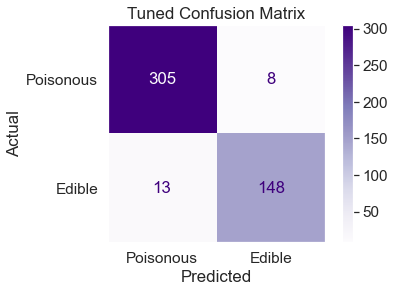

<Figure size 432x288 with 0 Axes>

In [521]:
ls = ['Poisonous','Edible']
disp = ConfusionMatrixDisplay(confusion_matrix=tuned_con_mat, display_labels=ls)
disp.plot(cmap = 'Purples')
plt.grid(False)
plt.title("Tuned Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig("Tuned Confusion Matrix.png", bbox_inches = "tight");

# Baseline Confusion Matrix

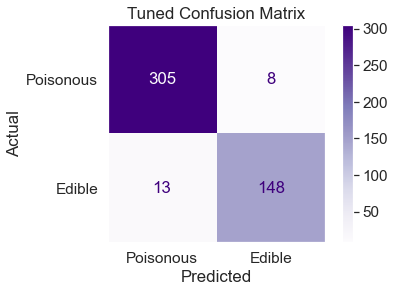

<Figure size 432x288 with 0 Axes>

In [511]:
val_predicts_2 = Sequential_NN_Second.predict(test_ds) 
y_pred_2 = 1*(val_predicts_2 >= 0.5) 
true_classes_2 = tf.concat([y for x, y in test_ds], axis=0)
base_con_mat = tf.math.confusion_matrix(labels = true_classes_2, predictions=y_pred_2).numpy()

base_con_mat = np.flip(base_con_mat,1)
base_con_mat

ls = ['Poisonous','Edible']
disp = ConfusionMatrixDisplay(confusion_matrix=tuned_con_mat, display_labels=ls)
disp.plot(cmap = 'Purples')
plt.grid(False)
plt.title("Tuned Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig("Baseline Confusion Matrix.png", bbox_inches = "tight");

In [512]:
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [514]:
148/161

0.9192546583850931

# Baseline Accuracy and Precision

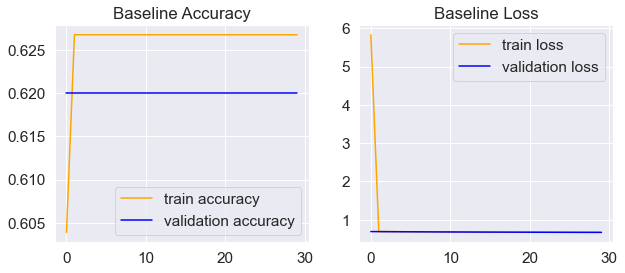

In [520]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Baseline Accuracy")
plt.plot(history.history['accuracy'], label='train accuracy', color='orange')
plt.plot(history.history['val_accuracy'], label='validation accuracy', color='blue')
plt.legend()

plt.subplot(1,2,2)
plt.title("Baseline Loss")
plt.plot(history.history['loss'], label='train loss', color='orange')
plt.plot(history.history['val_loss'], label='validation loss', color='blue')
plt.legend()

plt.savefig("accuracy_and_loss_baseline.png", bbox_inches = "tight");

plt.show()

# Baseline Precision

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(history.history['precision'], label='train precision', color='orange')
plt.plot(history.history['val_precision'], label='validation precision', color='blue')
plt.legend()
plt.title("Baseline Precision")
plt.savefig("precision_baseline.png", bbox_inches = "tight");

plt.show()

# Tuned Accuracy and Loss

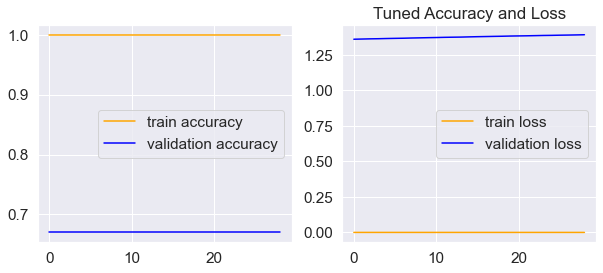

In [515]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(hist_final.history['accuracy'], label='train accuracy', color='orange')
plt.plot(hist_final.history['val_accuracy'], label='validation accuracy', color='blue')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_final.history['loss'], label='train loss', color='orange')
plt.plot(hist_final.history['val_loss'], label='validation loss', color='blue')
plt.legend()
plt.title("Tuned Accuracy and Loss")
plt.savefig("accuracy_and_loss_tuned.png", bbox_inches = "tight");

plt.show()

# Tuned Precision

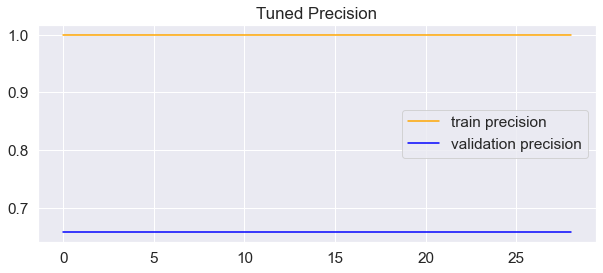

In [516]:
plt.figure(figsize=(10,4))

plt.plot(hist_final.history['precision'], label='train precision', color='orange')
plt.plot(hist_final.history['val_precision'], label='validation precision', color='blue')
plt.legend()
plt.title("Tuned Precision")
plt.savefig("precision_baseline.png", bbox_inches = "tight");
plt.show()